In [30]:

import jieba
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Text =text_from_file_with_apath = open('Miaoli.txt', 'r', newline='').read()

# 默認模式
seg_list = jieba.cut(Text, cut_all=False)
print('generator: ',seg_list)
for seg in seg_list:
  print(seg,end=' ')
print('')
seg_list = jieba.lcut(Text, cut_all=False)

generator:  <generator object Tokenizer.cut at 0x7fa21242af50>
" 急 ！ ！ 求 苗栗 推薦 牙醫 " , " 苗栗 橘舍 三食 + 二日 遊 " , " 起訴 書 掀監 造表 造假   查聯合 大地 10 邊坡 工程 標案 " , " 高鐵 班次 安排 是不是 有點 不 符合 現實 的 運量 ？ " , " 苗栗 / 新竹   工作 的 一些 問題 " , " # 分享   # 交換   蠟筆 小 新 全家 軟糖 公仔 " , " 就算 你們 地理 是 體育 老師教 的 ， 也 該 知道 水管 是 什麼 吧 ？ " , " 乾 ， 老天 爺快 下雨 吧 ， 親戚 都 搬 來 我家 了 " , " 台中 螢河 與 仙境 。 東勢 林場 、 大雪山 國家 森林 遊樂區 ⛰ ️ （ 外 插 苗栗 花露 農場 ） " , " 我 想 分享 我 和 我 男友 的 故事 2 " , " 一直 以為 是 火鍋店 的   涓 豆腐 " , " 已 畢業 的 幼保系 同學 ！ " , " 為 恭 醫院 " , " 跟 著粉 紅超 跑 去 旅行 " , " 每個 月 餐費 " , " 推薦 的 苗栗市 霧眉 " , " # 發問   苗栗 苑裡 熊貓 兼職 薪水 " , " 面試 經驗 分享 " , " 驚人 的 苗栗 國 " , " # 揪團   # 苗栗 竹南   4 - 5 月 徵 手模 " , " 從 太魯閣 出軌 事件 來 看台 灣 交通   以及 佳龍部長 " , " 台鐵 改革   學者 ： 停止 損害 台 鐵建設   將 3516 億轉 作台 鐵 重建 經費 " , " 苗栗 高鐵 停車 " , " 我 想 分享 我 和 我 男友 的 故事 " , " 5 / 11 ... 苗栗 " , " 星光 璀璨 仲夏夜   苗栗 生態 螢光 晚宴 " , " 雪季 降臨   4 月 苗栗 賞桐趣 " , " # 其他   闖紅燈 罰 錯人   埔 頂 派出所 " , " 帶 你 來 看看 鬼馬 才女 ~ 蘇運瑩 " , " 投票 傾向 " , " 我媽 被 假 仙姑 騙到 害 我哥 自殺 " , " 臺 灣各縣 市公車 站牌 " , " 更新 全 台 口服 Ａ 酸價格 整理 （ 歡迎 大家 補充 ） " , " 

In [31]:
# 移除停留詞
new_list=[]

def remove_stop_words(file_name,seg_list):
  with open('extra.txt','r', newline='',encoding="utf-8") as f:
    stop_words = f.readlines()
  stop_words = [stop_word.rstrip() for stop_word in stop_words]
  
  for seg in seg_list:
    if seg not in stop_words:
      new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
  return new_list
file_name = './停用詞.txt'
seg_list = remove_stop_words(file_name,seg_list)
print('remove_stop_words: ',seg_list)

remove_stop_words:  ['急', '！', '！', '求', '苗栗', '推薦', '牙醫', '苗栗', '橘舍', '三食', '二日', '遊', '起訴', '書', '掀監', '造表', '造假', ' ', '查聯合', '大地', '10', '邊坡', '工程', '標案', '高鐵', '班次', '安排', '符合', '現實', '運量', '？', '苗栗', '新竹', ' ', '工作', '分享', ' ', '交換', ' ', '蠟筆', '新', '全家', '軟糖', '公仔', '地理', '體育', '老師教', '，', '水管', '？', '乾', '，', '老天', '爺快', '下雨', '，', '親戚', '搬', '我家', '台中', '螢河', '仙境', '東勢', '林場', '大雪山', '國家', '森林', '遊樂區', '⛰', '️', '（', '外', '插', '苗栗', '花露', '農場', '）', '想', '分享', '男友', '故事', '火鍋店', ' ', '涓', '豆腐', '畢業', '幼保系', '同學', '！', '恭', '醫院', '著粉', '紅超', '跑', '旅行', '月', '餐費', '推薦', '苗栗市', '霧眉', '發問', ' ', '苗栗', '苑裡', '熊貓', '兼職', '薪水', '面試', '經驗', '分享', '驚人', '苗栗', '國', '揪團', ' ', '苗栗', '竹南', ' ', '月', '徵', '手模', '太魯閣', '出軌', '事件', '看台', '灣', '交通', ' ', '佳龍部長', '台鐵', '改革', ' ', '學者', '：', '停止', '損害', '台', '鐵建設', ' ', '3516', '億轉', '作台', '鐵', '重建', '經費', '苗栗', '高鐵', '停車', '想', '分享', '男友', '故事', '11', '苗栗', '星光', '璀璨', '仲夏夜', ' ', '苗栗', '生態', '螢光', '晚宴', '雪季', '降臨', ' ', '月', '苗栗', '賞桐趣', ' ',

In [32]:
# 統計詞頻
import pandas as pd
def count_segment_freq(seg_list):
  seg_df = pd.DataFrame(seg_list,columns=['seg'])
  seg_df['count'] = 1
  sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
  sef_freq = pd.DataFrame(sef_freq)
  return sef_freq
sef_freq = count_segment_freq(seg_list)
sef_freq.head()

,count
seg,
,308
苗栗,129
！,50
？,42
，,30


In [33]:
seg_list=' '.join(seg_list)

In [34]:
!ls

extra.txt   sample_data  strawberry.png  Taichung.xlsx
Miaoli.txt  SimHei.ttf	 Taichung.txt


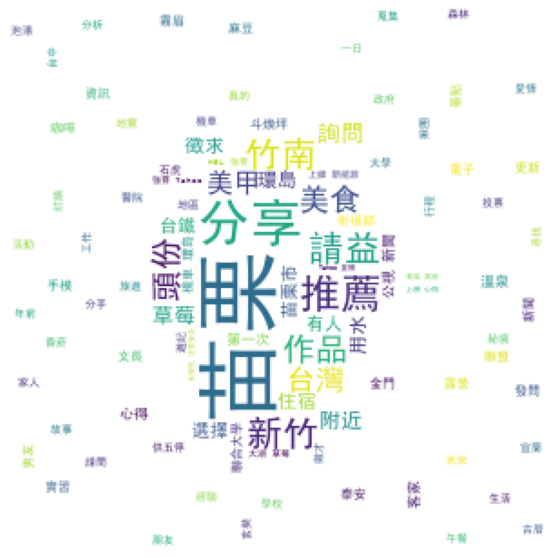

In [35]:
import imageio
back_color = imageio.imread('strawberry.png')
wc = WordCloud(background_color='white',font_path='SimHei.ttf',mask=back_color,)
wc.generate(seg_list)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

wc.to_file("wordcloud.jpg")